# Deep Learning project on snake classification(Venomous Non venomous)

Dataset Link - https://www.kaggle.com/code/mpwolke/venomous-non-venomous/input

**IMPORTING NECESSARY LIBRARY**

In [ ]:
import numpy as np
#import keras  # Remove this line to avoid conflict
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
# Updated import for ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array # Updated import for img_to_array


In [ ]:
## To connect Google Drive (GDrive) with Colab
# Step:2 Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio(r"/content/drive/MyDrive/Deep Learning", output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 1989 files [01:00, 33.08 files/s] 


In [ ]:
# Sorting the path of data into veriable
train_dir = '/content/output/train'  #Location of training images
validation_dir = '/content/output/val' # Location of test images
test_dir ='/content/output/test' # Location of test images

**GENERATING TRAINING AND VALIDATION BATCHES OF IMAGES**

In [ ]:
# Generating batches of image data
train_datagen = ImageDataGenerator(
    rescale= (1./255),
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=(1./255))




train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='binary')


val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='binary')



Found 1590 images belonging to 2 classes.
Found 198 images belonging to 2 classes.


**PLOTTING TRAIN IMAGES WITH THEIR LABELS**

In [ ]:
 # plotting train images with their labels
import matplotlib.pyplot as plt # Import the necessary library

def plots(ims, figsize=(20,25), rows=4, interp = False, title = None):
    f = plt.figure(figsize=figsize)
    cols = len(ims) // rows if len(ims) % 2 ==0 else len(ims) // rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        # Assuming title[i] is a single value (0 or 1) representing the class index:
        sp.set_title(class_names[int(title[i])], fontsize=16)
        plt.imshow(ims[i])


# Make list of classes
class_names = ['venomous','non venomous']

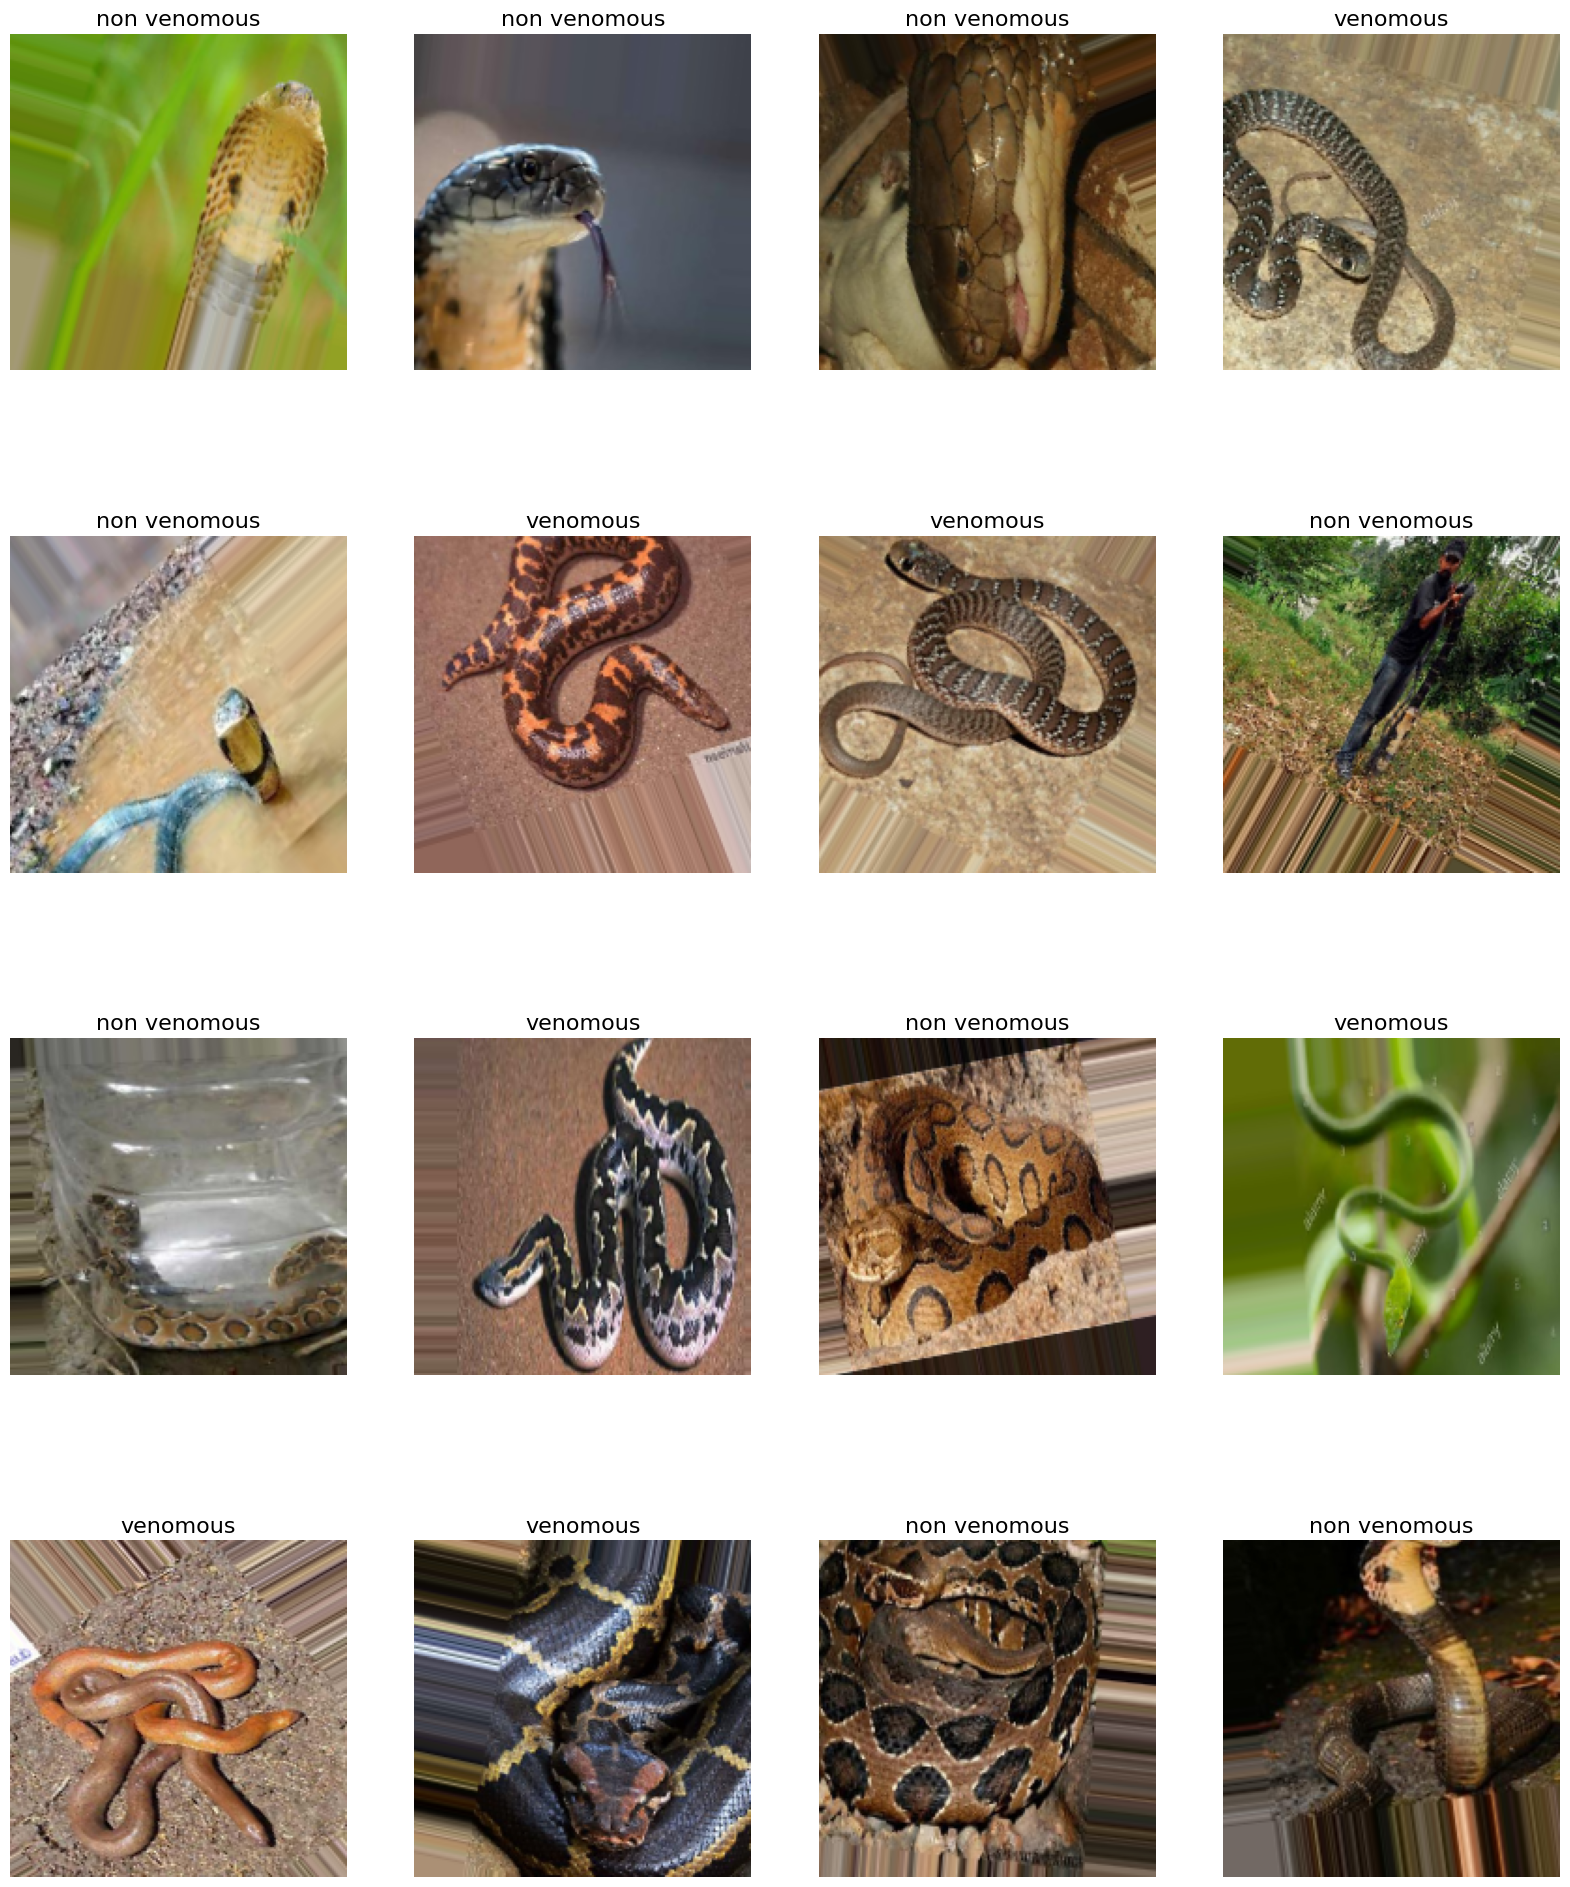

In [ ]:
imgs, labels = next(train_generator)
plots(imgs, title = labels)

**CNN MODEL ARCHITECTURE**

In [ ]:
from keras import models, layers

model = models.Sequential()

# Convolutional and Pooling Layers
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(180, 180, 3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Dropout for regularization
model.add(layers.Dropout(rate=0.5))

# Flattening the 3D output to 1D for Dense layers
model.add(layers.Flatten())

# Dense layer with 1 output neuron for binary classification
model.add(layers.Dense(1, activation='sigmoid'))  # Use 'sigmoid' for binary classification

# Compiling the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**PLOTTING GRAPHICAL REPRESENTATION OF MODEL**

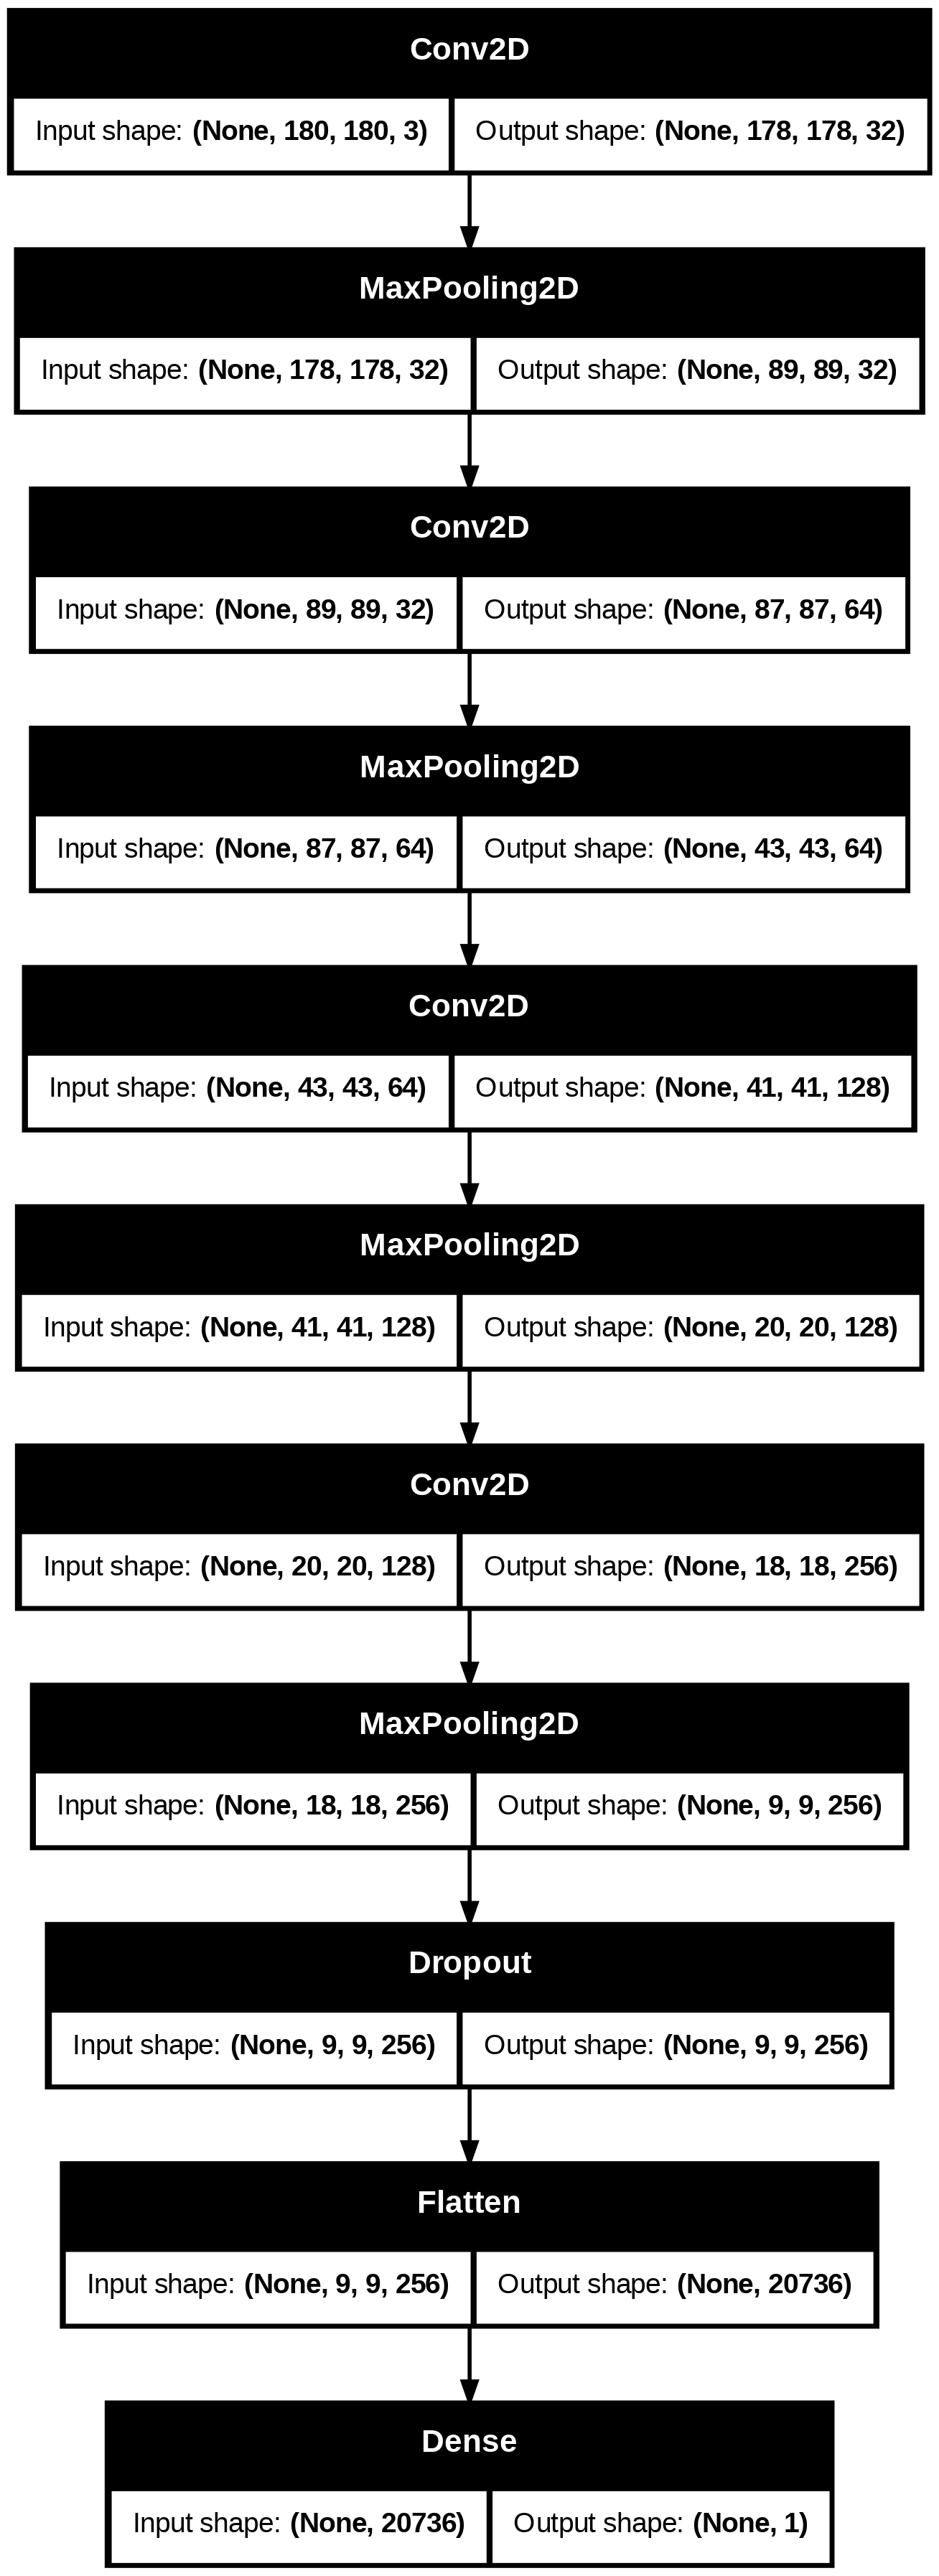

In [ ]:
!pip install pydot
!pip install graphviz

# Import necessary libraries
from tensorflow import keras
import pydot
import graphviz
from keras.utils import plot_model

# ... your model definition ...

# Visualize the model
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          20,737 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 409,153 (1.56 MB)

 Trainable params: 409,153 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

**TRAIN MODEL**

In [ ]:
# Fitting the data
history = model.fit(
    train_generator,
    epochs=30,  # epochs used to how many iteration (1fp + loss + 1bp)
    validation_data=val_generator,
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.5815 - loss: 0.6923 - val_accuracy: 0.5960 - val_loss: 0.6760
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.5986 - loss: 0.6769 - val_accuracy: 0.5960 - val_loss: 0.6792
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.5880 - loss: 0.6792 - val_accuracy: 0.5859 - val_loss: 0.7963
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.5955 - loss: 0.6677 - val_accuracy: 0.5960 - val_loss: 0.6888
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.6156 - loss: 0.6620 - val_accuracy: 0.6061 - val_loss: 0.6770
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6356 - loss: 0.6499 - val_accuracy: 0.5808 - val_loss: 0.9390
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.6285 - loss: 0.6467 - val_accuracy: 0.5909 - val_loss: 0.6884
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.6348 - loss: 0.6568 - val_accuracy: 0.580

Validation accuracy.61.67%
Training accuracy.65.38%


In [ ]:
model.save('model.h5')

**PLOTTING THE TRAINING ACCURACY AND VALIDATION ACCURACY AND TRAINING LOSS AND VALIDATION LOSS**

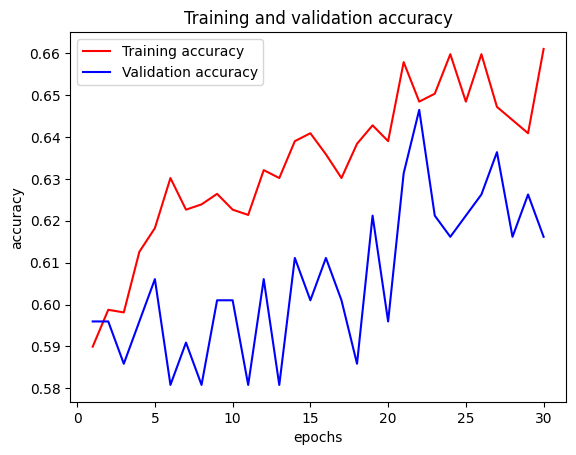

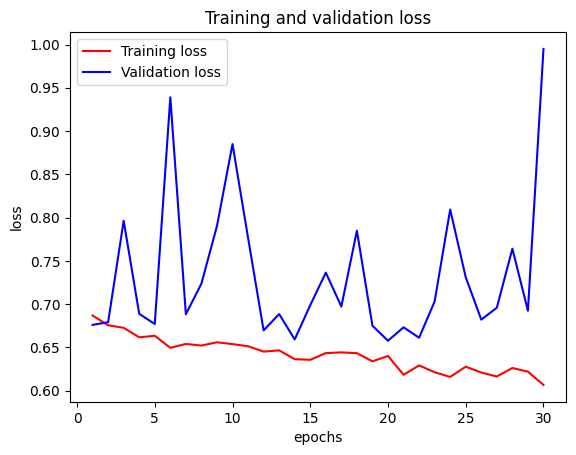

In [ ]:
# Step:9 Plotting the training accuracy and validation accuracy
# Plotting the traning loss and validation loss
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

**Testing Accuracy**

In [ ]:
test_datagen = ImageDataGenerator(rescale=(1./255))


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='binary')

Found 201 images belonging to 2 classes.


In [ ]:
model.evaluate(test_generator)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 534ms/step - accuracy: 0.6067 - loss: 1.0148


[0.9247806072235107, 0.6368159055709839]

**Visualise the prediction of the model**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


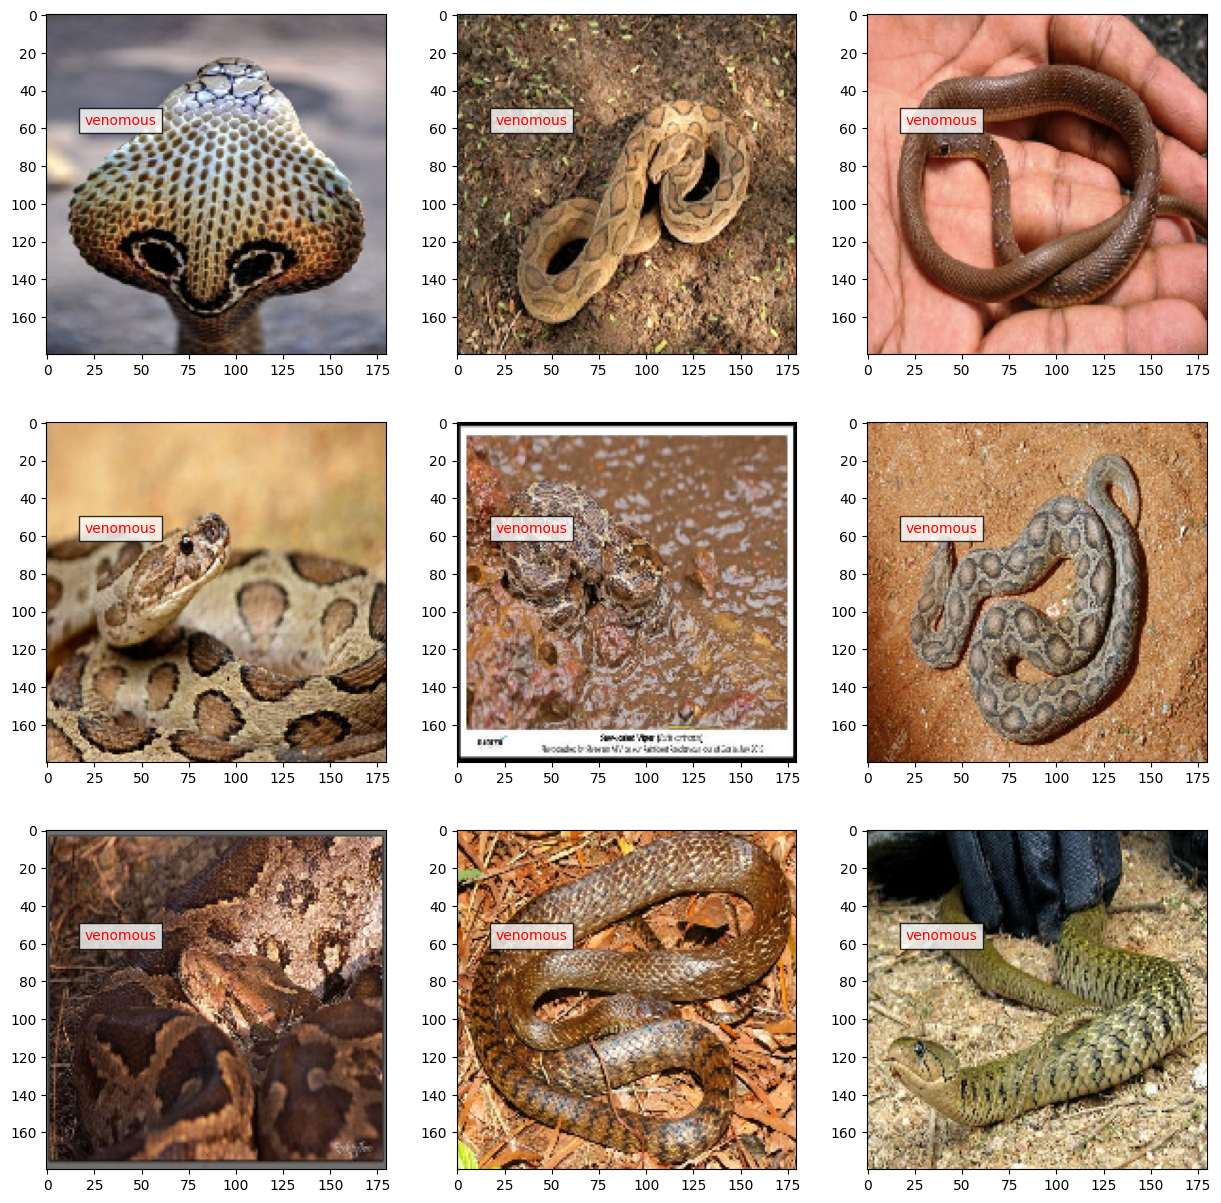

In [ ]:
# Visualise the prediction of the model
imgs, labels = next(test_generator)
fig =plt.figure(figsize=(15,15))
columns = 3
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t = np.expand_dims(imgs[i],axis=0)
    prediction = model.predict(img_t)
    idx = prediction[0].tolist().index(max(prediction[0]))
    plt.text(20,58, class_names[idx],color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])